# *What is League of Legends? *


League of Legends (abbreviated LoL) is a multiplayer online battle arena video game developed and published by Riot Games for Microsoft Windows and macOS, which features two teams of five player each competing against each other with the ultimate goal of destroying the opposing's team nexus's structure (base). In September 2016, the company estimated that there are over 100 million active players each month.[2] It also has a large competitive scene involving dozens of teams participating in both national and international tournaments. 

The game takes place across two broadly defined phases. In the first phase (or Drafting phase), each side takes turns assembling their team by selecting a unique character (called a champion) from a pool of 145 (as of this writing) without replacement. Then, in the second phase (or Game phase), each player in the match takes control of one of the champions chosen by their team and attempts to claim victory. Although not strictly required by the game, over the years players have grown to play their champion in one of five roles named after the location on the map in which they typically start the game, and often corresponding to the amount of in-game resources that player will have devoted to them.



This report will be mainly focusing on drafting and how it will affecting the result of a game.



## *1.1What is drafting in LoL and how it can affect the game?*

Each champion will have their each distinct set of abilities and charateristics that allow them to excel and fall behing in different area of game situations. So in order to maximize the odd of victory, a team usually have different playstyle based on the opposing team champion composition they play against with and ones they are familiar with. Teams can abrupt or avoid certain champions pick to be played by banning them during the drafting phase.There are two types of submissions made during the drafting phase. In the banning portions of the draft champions are removed from the pool of allowed submissions, whereas champions are added to the roster of the submitting team during the pick phases. The drafting alternates between banning and picking until both teams have a full roster of five champions, at which point the game is played. The structure of the drafting phase is displayed in Figure below. Note the asymmetry between teams (for example Blue bans first in ban phase one, while Red bans first in ban phase two) and between the phases themselves (ban phases always alternate sides, while pick phases "snake" between teams).

Although different team composition might have bring advantanges to the team with better draft. The result of a game is always uncertain due to lots undertermined factors such as player's mechanic, decision making, condition and so on, just like any regular sport. 

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://am-a.akamaihd.net/image?f=https://news-a.akamaihd.net/public/images/articles/2017/10_bans_coming/Pick_Phases.jpg&resize=1536:") #[3]


## *1.2 What is LoL World Championship* ?


[1]The "League of Legends" World Championship includes 24 professional teams representing 13 regions from around the world. Worlds began on October 2 and are swiftly moving towards the finals on November 10, with matches being held in Berlin, Madrid, and Paris. The Worlds prize pool starts at $2.25 million and will continue to increase with player purchases through November 6.



## *1.3 Questions*
With the recent win of team from China second year in a row, I wanted to dive into a few areas of stats to look:
1. What are the variable for a team to win a game in Worlds 2019? 
2. Analysing champion played throughout the tournament 
3. Is there certain champions combination have higher winrate?
4. Do winning teams always win with certian champion


## *1.4 Methodology/Methods*
A heatmap correlation plot graph will be used to analyse game variable that can affects the game result. Just like any sport,the most important thing in a game is to find out who is the winner and a heatmap can easily show and visualize the correlation between winning and in-game variable.

Association Rules with Apriori will be used to determine what are the team champion composition with most appearance, win rate and lose rate. It can also help to determine winning team favourite champion composition.

## *2.1 Initial Data Report*

The datas that I used to generate this 2019 Worlds Championship report is mainly from 2019-worlds-match-data , region analysis data will be taken from 2019-spring-match-data and 2019-summer-match-data. All the datas can be received for free from http://oracleselixir.com/match-data/. A data dictionary can be refered here : http://oracleselixir.com/match-data/match-data-dictionary/.

In [12]:
#2.1.1 Import worlds 2019 data
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import preprocessing

path = "2019-worlds-match-data.csv"
#colNames=["gameId,game,playerId,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,elementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,herald,heraldtime,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime"]
worlds = pd.read_csv(path,sep=',')

#The dataset consists of every competitive game that has been played during the 2019 world championiship.
#Here is a what one match looks like in the dataset :
worlds.head(12)



,gameid,url,league,split,date,week,game,patchno,playerid,side,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,1,Blue,...,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,2,Blue,...,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,3,Blue,...,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,4,Blue,...,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,5,Blue,...,-1156,2731,2376,355,4,3,1,6,5,1
5,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,6,Red,...,798,5051,4530,521,90,76,14,122,116,6
6,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,7,Red,...,1366,3928,3679,249,64,60,4,105,88,17
7,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,8,Red,...,629,4533,4751,-218,85,88,-3,150,131,19
8,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,9,Red,...,1829,3532,3526,6,76,87,-11,134,119,15
9,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,10,Red,...,1156,2376,2731,-355,3,4,-1,5,6,-1


## 2.2 Describe Data

Let's see how big the dataset is 

In [13]:
print('We have',worlds.shape[0],'rows and ',worlds.shape[1],' columns to work on.')


We have 1428 rows and  98  columns to work on.


In [14]:
worlds.columns

Index(['gameid', 'url', 'league', 'split', 'date', 'week', 'game', 'patchno',
       'playerid', 'side', 'position', 'player', 'team', 'champion', 'ban1',
       'ban2', 'ban3', 'ban4', 'ban5', 'gamelength', 'result', 'k', 'd', 'a',
       'teamkills', 'teamdeaths', 'doubles', 'triples', 'quadras', 'pentas',
       'fb', 'fbassist', 'fbvictim', 'fbtime', 'kpm', 'okpm', 'ckpm', 'fd',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elementals',
       'oppelementals', 'firedrakes', 'waterdrakes', 'earthdrakes',
       'airdrakes', 'elders', 'oppelders', 'herald', 'heraldtime', 'ft',
       'fttime', 'firstmidouter', 'firsttothreetowers', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochamps', 'dmgtochampsperminute', 'dmgshare',
       'earnedgoldshare', 'wards', 'wpm', 'wardshare', 'wardkills', 'wcpm',
       'visionwards', 'visionwardbuys', 'visiblewardclearrate',
       'invisiblewardclearrate', 'totalgold', 'earnedg

In [15]:
worlds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 98 columns):
gameid                     1428 non-null int64
url                        1428 non-null object
league                     1428 non-null object
split                      1428 non-null object
date                       1428 non-null float64
week                       1428 non-null object
game                       1428 non-null object
patchno                    1428 non-null float64
playerid                   1428 non-null int64
side                       1428 non-null object
position                   1428 non-null object
player                     1428 non-null object
team                       1428 non-null object
champion                   1428 non-null object
ban1                       1428 non-null object
ban2                       1428 non-null object
ban3                       1428 non-null object
ban4                       1428 non-null object
ban5                       14

As you can see , the dataset is very large and contains 3 data types,so we certainly only going to work on few columns at a time.
At the moment we are just going to analyse champion draft so we just going select pick,ban and their game result.

In [16]:
#Verify missing data
print("Total missing value",worlds.isnull().sum().sum())
worlds.isnull().sum()

Total missing value 1292


gameid       0
url          0
league       0
split        0
date         0
            ..
oppcsat10    0
csdat10      0
csat15       0
oppcsat15    0
csdat15      0
Length: 98, dtype: int64

2
Despite having 1292 missing values, we know that some cells are always blank because they might be player's stat or team's stat. We are not going to use all 98 columns in the dataset so we just have to check missing values for all dataframe we retrieved.

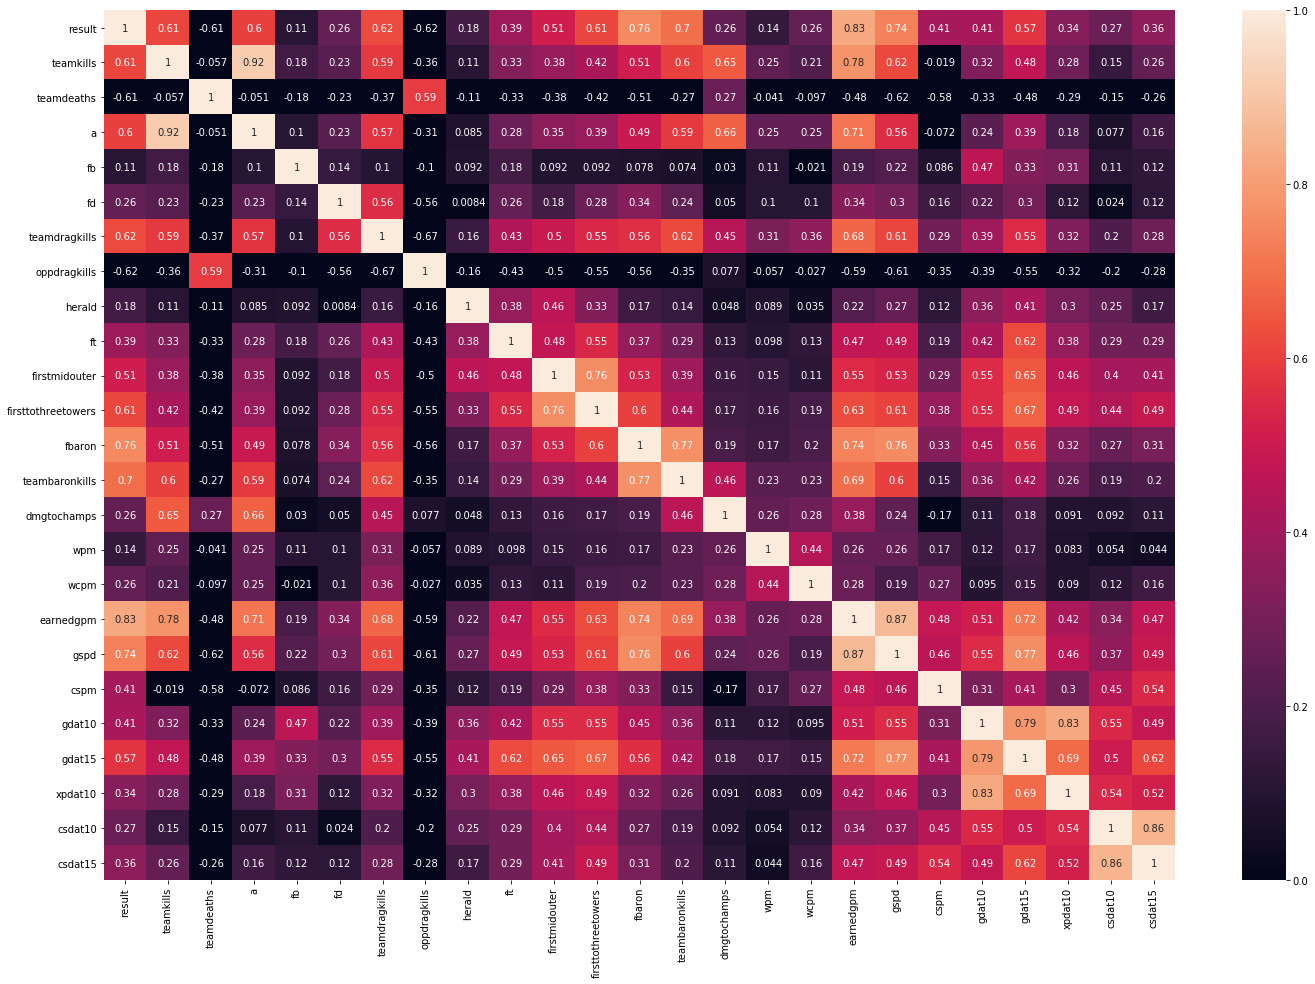

In [17]:
#team heatmap
worldteam = worlds[worlds['position']=="Team"]
worldteam = worldteam[['result','teamkills','teamdeaths','a','fb','fd','teamdragkills','oppdragkills','herald','ft','firstmidouter','firsttothreetowers','fbaron','teambaronkills','dmgtochamps','wpm','wcpm','earnedgpm','gspd','cspm','gdat10','gdat15','xpdat10','csdat10','csdat15']]
worldteam.astype('float64')

normalized_df=(worldteam-worldteam.min())/(worldteam.max()-worldteam.min())
f, ax = plt.subplots(figsize=(24, 16))
heatmap = sns.heatmap(normalized_df.corr(),annot = True,vmin=0, vmax=1)

## Game variable correlation analysis
From this correlation graph we can tell that winrate (result) is strongly correlates to things related to gold earning or current items worth which seems pretty normal.However there are some weaker correlations are still interesting,
    1. Having first blood ,higher Creep Score (CS) or dealing more damages to enemies for the team doesn't impact winrate a lot.
    2. Wards per minute and ward clear per minute doesn't impact winrate a lot.
    3  Getting first Baron is more than having first Dragon, which make sense at all. Because Baron provides a team huge powerspike in terms of pushing ability compare to permanent buff from dragon, which are effective for scalling to late game. It shows that a team can snowball a game very hard with their first Baron.
    4. A team that has more death are more likely to deal more damage to enemy team.
    5. 

In [18]:
#First we analyse which 5 champions has the most pick/ban rate

#we are just going to select column of picking and banning champion of each game (groupby gameid)
pickBanChampion = worlds[['gameid','side','team','position','champion','ban1','ban2','ban3','ban4','ban5','result']]
#get a list of team ban
teamCondition = pickBanChampion['position'] == "Team"
teamBanDf = pickBanChampion[teamCondition]
teamBanDf.head(6)



,gameid,side,team,position,champion,ban1,ban2,ban3,ban4,ban5,result
10,1070340,Blue,DetonatioN FocusMe,Team,,Qiyana,Gangplank,Akali,Elise,Olaf,0
11,1070340,Red,Splyce,Team,,Heimerdinger,Pantheon,Syndra,Cassiopeia,Kai'Sa,1
22,1070330,Blue,Clutch Gaming,Team,,Syndra,Yuumi,Qiyana,Caitlyn,Draven,0
23,1070330,Red,Unicorns of Love,Team,,Pantheon,Rumble,Gangplank,Skarner,Elise,1
34,1070349,Blue,Mammoth,Team,,Qiyana,Kayle,Morgana,Thresh,Pyke,1
35,1070349,Red,Unicorns of Love,Team,,Pantheon,Vladimir,Rakan,Xayah,Lucian,0


In [19]:
#Check for missing value
print("Total missing value",teamBanDf.isnull().sum().sum())
teamBanDf.isnull().sum()

Total missing value 1


gameid      0
side        0
team        0
position    0
champion    0
ban1        0
ban2        0
ban3        0
ban4        0
ban5        1
result      0
dtype: int64

In [20]:
#Find out the which row has the missing value
nans = lambda df: df[df.isnull().any(axis=1)]
nans(teamBanDf)

,gameid,side,team,position,champion,ban1,ban2,ban3,ban4,ban5,result
671,1061147,Red,Team Liquid,Team,,Pantheon,Kayle,Syndra,Irelia,NaN,1


Based on the results above, it shows that one team has only banned 4 champion in the draft phase. As I checked back the game history, it is in fact Team Liquid forfeit their 5th ban when playing against AHQ e-Sports Club, with gameid 1061147

In [21]:

#get a list of team champion pick
teamCondition = pickBanChampion['position'] != "Team"
teamPickDf = pickBanChampion[teamCondition][['gameid','side','champion','result']]
teamPickDf.head()


,gameid,side,champion,result
0,1070340,Blue,Gnar,0
1,1070340,Blue,Ekko,0
2,1070340,Blue,Nocturne,0
3,1070340,Blue,Lucian,0
4,1070340,Blue,Thresh,0


In [23]:
#Check for missing value
teamPickDf.isnull().sum()

gameid      0
side        0
champion    0
result      0
dtype: int64

In [24]:
#get number of world game played
numOfGamePlayed = len(worlds[['gameid']].groupby('gameid'))
numOfGamePlayed



119

Based on the result above, we know that 119 games were played in the 2019 lol worlds championship.It can be used to determine the champions win rate , ban rate, and presence rate in the worlds 2019 tournament.

As of patch 9.19 , there are 145 champions are available to play in the game.

The next stage is to find out how many unique champions were played in 2019  LoL Worlds Championship.

In [25]:
#based on the result above, we know that 119 games were played in the 2019 lol worlds championship
#As of patch 9.19 , there are 145 champions in the game
totalNumChamp = 145

#now we need to get num of pick appearance for each champion 

#get all picked champion list
pickChampList = teamPickDf['champion'].unique()
pickChampList.sort()


print ("Number of unique champion played in the worlds 2019 is",len(pickChampList))

#num of champion played 
percentChampPlayed = ( len(pickChampList)/ totalNumChamp ) * 100

print(round(percentChampPlayed,2) ,"percent of champions were played in the worlds tournament")



Number of unique champion played in the worlds 2019 is 98
67.59 percent of champions were played in the worlds tournament


Above we discovered that 98 unique champions were played out of 145 champions(As of patch 9.19) were played in the worlds tournament, which means 67.59 percent of champions out of the champion pool were played in the tournament, which is considered not too bad compared to previous years. (2016 has only 57 unique champions played) [3]

Next, we are going to find out which champion got picked,banned and presense the most throughout the whole tournament (pick rate , ban rate and presense rate)

Text(0.5, 0, 'Champions')

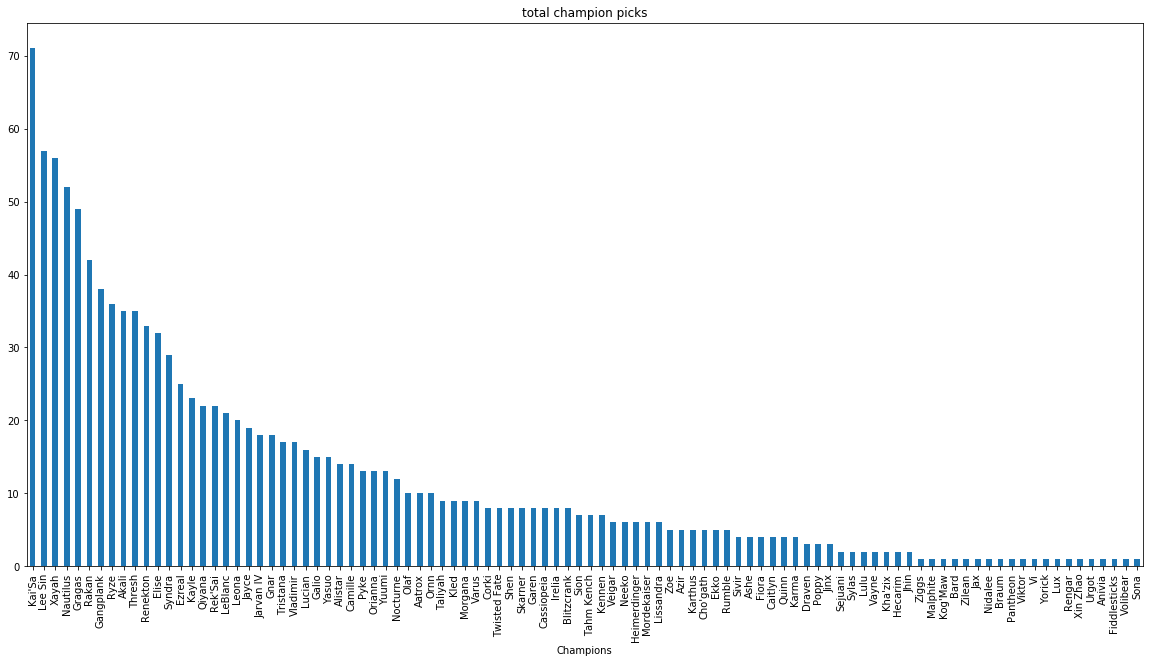

In [26]:
#now we see which champion got picked the most throughout the whole tournament
#get the number of each champion picked throughout the tournament

#sns.set(style="darkgrid")
#ax = sns.countplot(x=teamPickDf['champion'].value_counts(),data=teamPickDf)

teamPickDf['champion'].value_counts().plot(kind="bar",figsize=(20,10)).set_title("total champion picks")
teamPickDf['champion'].value_counts().plot(kind="bar",figsize=(20,10)).set_xlabel("Champions")

Text(0.5, 0, 'Champions')

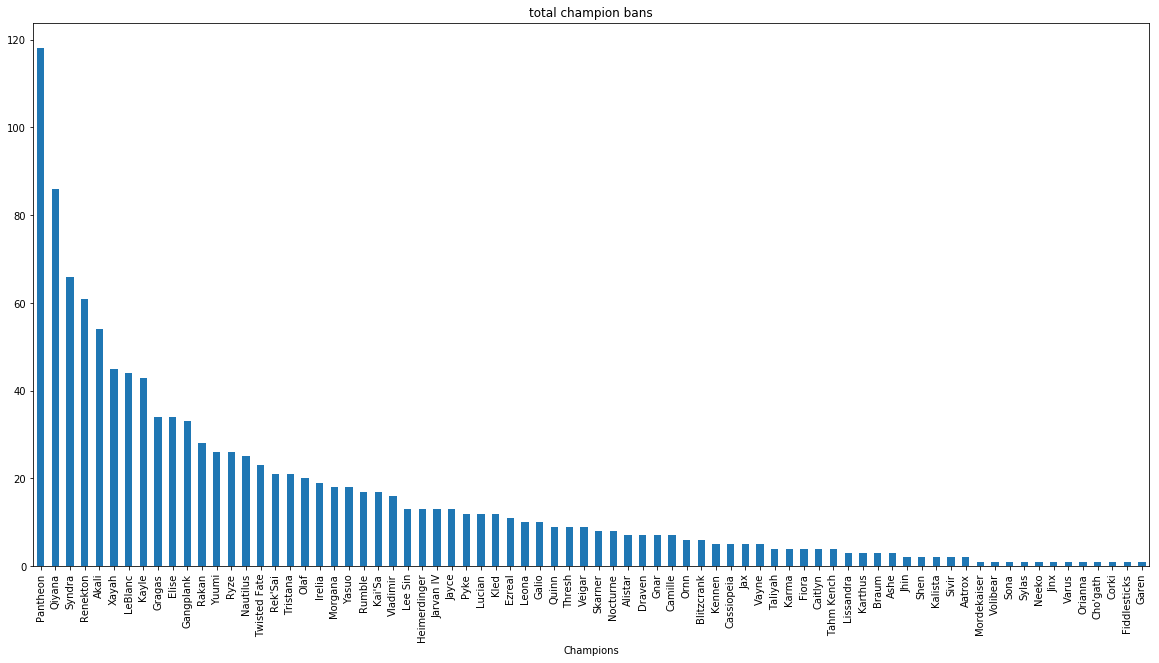

In [27]:
#get ban champion
#concat everything together,References from https://www.kaggle.com/jaytegge/league-of-legends-data-analysis/data , line 14
champBanList = pd.concat([teamBanDf['ban1'],teamBanDf['ban2'],teamBanDf['ban3'],teamBanDf['ban4'],teamBanDf['ban5']],ignore_index=True)


champBanList.value_counts().plot(kind="bar",figsize=(20,10)).set_title("total champion bans")
champBanList.value_counts().plot(kind="bar",figsize=(20,10)).set_xlabel("Champions")

Text(0.5, 0, 'Champions')

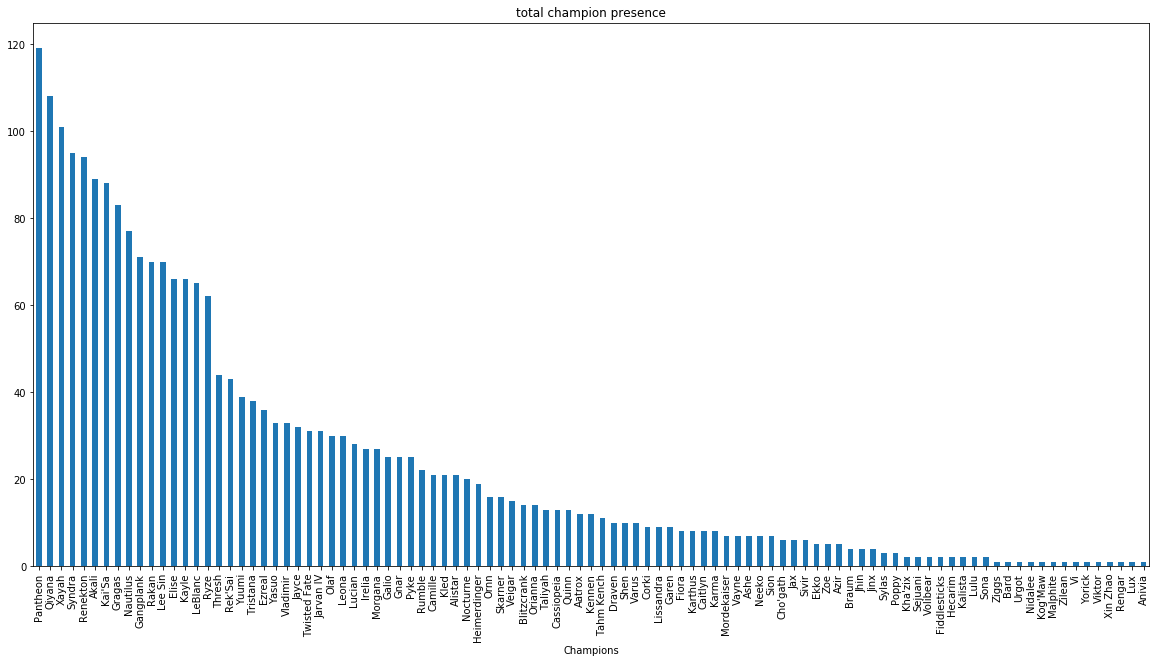

In [28]:
#find the presence rate (picks and bans for each champion )
pickBanList = pd.concat([teamPickDf['champion'],teamBanDf['ban1'],teamBanDf['ban2'],teamBanDf['ban3'],teamBanDf['ban4'],teamBanDf['ban5']],ignore_index=True)
pickBanList.value_counts().plot(kind="bar",figsize=(20,10)).set_title("total champion presence")
pickBanList.value_counts().plot(kind="bar",figsize=(20,10)).set_xlabel("Champions")


Based on the results above we got the number of times of champion picked , banned and presence in the worlds tournament. Now we translate the data into percentile and only present the top 10 results.

In [29]:
#top 10 bans champions

top10bans = champBanList.value_counts().nlargest(10)
for i in range (0,top10bans.shape[0]):  #from 0 to the last top 10 champion that were banned throughout the tournament
    print(top10bans.index[i],'was banned',top10bans[i],'times, which is',str("%.2f" %((top10bans[i]/numOfGamePlayed)*100))+'% of the matches.')
    


Pantheon was banned 118 times, which is 99.16% of the matches.
Qiyana was banned 86 times, which is 72.27% of the matches.
Syndra was banned 66 times, which is 55.46% of the matches.
Renekton was banned 61 times, which is 51.26% of the matches.
Akali was banned 54 times, which is 45.38% of the matches.
Xayah was banned 45 times, which is 37.82% of the matches.
LeBlanc was banned 44 times, which is 36.97% of the matches.
Kayle was banned 43 times, which is 36.13% of the matches.
Gragas was banned 34 times, which is 28.57% of the matches.
Elise was banned 34 times, which is 28.57% of the matches.


In [30]:
top10picks = teamPickDf['champion'].value_counts().nlargest(10)
for i in range(0,top10picks.shape[0]):
    print(top10picks.index[i],'was picked',top10picks[i],'times, which is',str("%.2f" %((top10picks[i]/numOfGamePlayed)*100))+'% of the matches.')

Kai'Sa was picked 71 times, which is 59.66% of the matches.
Lee Sin was picked 57 times, which is 47.90% of the matches.
Xayah was picked 56 times, which is 47.06% of the matches.
Nautilus was picked 52 times, which is 43.70% of the matches.
Gragas was picked 49 times, which is 41.18% of the matches.
Rakan was picked 42 times, which is 35.29% of the matches.
Gangplank was picked 38 times, which is 31.93% of the matches.
Ryze was picked 36 times, which is 30.25% of the matches.
Akali was picked 35 times, which is 29.41% of the matches.
Thresh was picked 35 times, which is 29.41% of the matches.


In [31]:
top10presence = pickBanList.value_counts().nlargest(10)
for i in range(0,top10presence.shape[0]):
    print(top10presence.index[i],'was picked or banned',top10presence[i],'times, which is',str("%.2f" %((top10presence[i]/numOfGamePlayed)*100))+'% of the matches.')

Pantheon was picked or banned 119 times, which is 100.00% of the matches.
Qiyana was picked or banned 108 times, which is 90.76% of the matches.
Xayah was picked or banned 101 times, which is 84.87% of the matches.
Syndra was picked or banned 95 times, which is 79.83% of the matches.
Renekton was picked or banned 94 times, which is 78.99% of the matches.
Akali was picked or banned 89 times, which is 74.79% of the matches.
Kai'Sa was picked or banned 88 times, which is 73.95% of the matches.
Gragas was picked or banned 83 times, which is 69.75% of the matches.
Nautilus was picked or banned 77 times, which is 64.71% of the matches.
Gangplank was picked or banned 71 times, which is 59.66% of the matches.


## Champions pick, ban and presence in Worlds 2019
As we can see Pantheon has an staggering 100% presence rate with 99.16% ban rate in this Worlds Championship tournament. He was considered a strong pick due to strong early game and able to roam fast after level 6. Qiyana also has an over 70% ban rate and were presense in 90.76% of the matches, despite she is slightly weaker in the early game when played mid against mage or ranged hero, but she can also be played in the Jungle and has strong roam potential and great engage around objectives. Xayah and Kaisa are the only bottom lane champion appeared in the top 10 list, this is because both of them can reach huge power spike after getting 2 items compared to other champion right now. With the engage support being stronger at tht bottom lane this patch, they are able to burst down enemies faster than other bottom lane champion could.


However, champions with high pick, ban and presence rate do not means they are overpowerd or confirm to win the match. League of Legends is a well balanced game and every champions can be played to match certain playstyle. But it doesn't mean those champions in the top 10 list are no different than the other champions, they are definitely stronger in this patch and hence they are always picked or banned. So to determine which champions and what champion composition performed best in the world tournament, we have to look into the champion win rate.

In [36]:
#Do win rate



def champPickedNum(champName):
    champPickCount = teamPickDf['champion'].value_counts()
    champPick =  champPickCount[champName]
    return champPick


def champWinNum(champName):
    winCondition = teamPickDf['result'] == 1
    champWinRateDf = teamPickDf[winCondition][['gameid','side','champion','result']]
    champWins = champWinRateDf['champion'].value_counts()
    
    #check if champName is in the champWins list
    if(champName in champWins):
        return champWins[champName]
    else:
        return 0

#create an empty dataframe
dfColumns = ['champion','pick','winrate']
winRateDf = pd.DataFrame(columns=dfColumns)
winRateDf

for i in range(0,len(pickChampList)):
    champName = pickChampList[i]
    winrate = round((champWinNum(champName)/champPickedNum(champName))*100,2)
    #print(champName , round((champWinNum(champName)/champPickedNum(champName))*100,2),'%')
    
    #create dummy dataframe and append to the winRateDf
    data = {'champion':[champName],'pick':[champPickedNum(champName)],'winrate':[winrate]}
    dummyDf = pd.DataFrame(data=data)
    #pd.concat([winRateDf,dummyDf],ignore_index=True)
    winRateDf = winRateDf.append(dummyDf)

winRateDf.sort_values(by=['winrate'],ascending=False)


,champion,pick,winrate
0,Jax,1,100.0
0,Vayne,2,100.0
0,Malphite,1,100.0
0,Kog'Maw,1,100.0
0,Fiddlesticks,1,100.0
...,...,...,...
0,Braum,1,0.0
0,Caitlyn,4,0.0
0,Lux,1,0.0
0,Sejuani,2,0.0


As you can see the dataframe above, we cant say Champion with 100% winrate are going to win every match because they were probably only played once or twice.

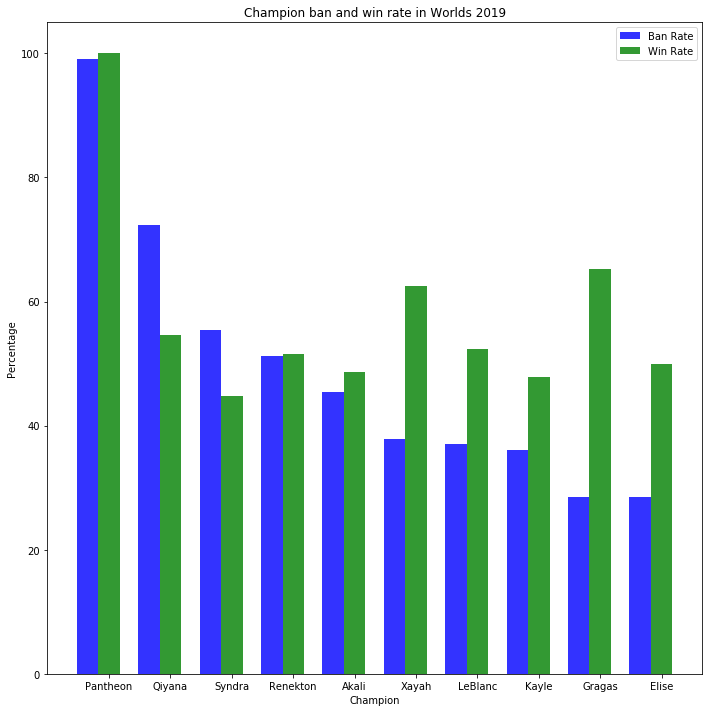

In [37]:
#Display top 10 banrate winrate

#for i in range (0,top10bans.shape[0]):  #from 0 to the last top 10 champion that were banned throughout the tournament
    #print(top10bans.index[i],'was banned',top10bans[i],'times, which is',str("%.2f" %((top10bans[i]/numOfGamePlayed)*100))+'% of the matches, has',(winRateDf[winRateDf['champion']== top10bans.index[i]]['winrate']).iloc[0],'% winrate')

#get array of champion banned times
chBanArr =[]
for i in range (0,top10bans.shape[0]):  #from 0 to the last top 10 champion that were banned throughout the tournament
    chBanArr.append((top10bans[i]/numOfGamePlayed)*100)
    

#get array of champion winrate
chWRArr =[]
for i in range (0,top10bans.shape[0]):  #from 0 to the last top 10 champion that were banned throughout the tournament
    chWRArr.append((winRateDf[winRateDf['champion']== top10bans.index[i]]['winrate']).iloc[0])
    
#get array of banned champ name
chBanName = []
for i in range (0,top10bans.shape[0]):  #from 0 to the last top 10 champion that were banned throughout the tournament
    chBanName.append(top10bans.index[i])
    
#referencing bar chart from https://pythonspot.com/matplotlib-bar-chart/
n_groups = 10

# create plot
fig, ax = plt.subplots(figsize=(10,10))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, chBanArr, bar_width,alpha=opacity,color='b',label='Ban Rate')
rects2 = plt.bar(index + bar_width, chWRArr, bar_width,alpha=opacity,color='g',label='Win Rate')

plt.xlabel('Champion')
plt.ylabel('Percentage')
plt.title('Champion ban and win rate in Worlds 2019')
plt.xticks(index + bar_width,chBanName)
plt.legend()

plt.tight_layout()
plt.show()

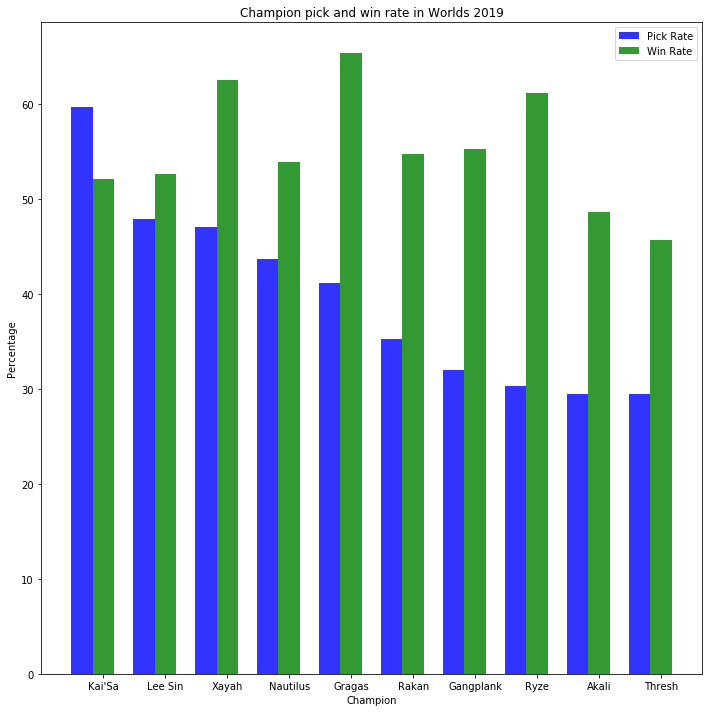

In [38]:
#Display top 10 pick champ
#for i in range(0,top10picks.shape[0]):
    #print(top10picks.index[i],'was picked',top10picks[i],'times, which is',str("%.2f" %((top10picks[i]/numOfGamePlayed)*100))+'% of the matches, has',(winRateDf[winRateDf['champion']== top10picks.index[i]]['winrate']).iloc[0],'% winrate')
    
#get array of champion pick times
chPickArr =[]
for i in range (0,top10picks.shape[0]):  #from 0 to the last top 10 champion that were banned throughout the tournament
    chPickArr.append((top10picks[i]/numOfGamePlayed)*100)
    

#get array of champion winrate
chWRArr =[]
for i in range (0,top10bans.shape[0]):  #from 0 to the last top 10 champion that were banned throughout the tournament
    chWRArr.append((winRateDf[winRateDf['champion']== top10picks.index[i]]['winrate']).iloc[0])
    
#get array of picked champ name
chPickName = []
for i in range (0,top10picks.shape[0]):  #from 0 to the last top 10 champion that were banned throughout the tournament
    chPickName.append(top10picks.index[i])
    
#referencing bar chart from https://pythonspot.com/matplotlib-bar-chart/
n_groups = 10

# create plot
fig, ax = plt.subplots(figsize=(10,10))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, chPickArr, bar_width,alpha=opacity,color='b',label='Pick Rate')
rects2 = plt.bar(index + bar_width, chWRArr, bar_width,alpha=opacity,color='g',label='Win Rate')

plt.xlabel('Champion')
plt.ylabel('Percentage')
plt.title('Champion pick and win rate in Worlds 2019')
plt.xticks(index + bar_width,chPickName)
plt.legend()

plt.tight_layout()
plt.show()

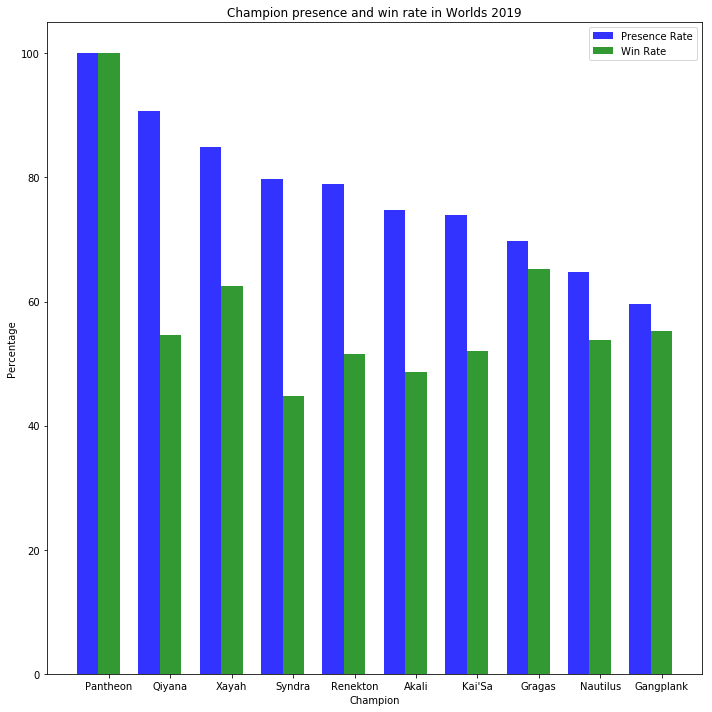

In [39]:
#Display top 10 presence champ
#for i in range(0,top10presence.shape[0]):
    #print(top10presence.index[i],'was picked or banned',top10presence[i],'times, which is',str("%.2f" %((top10presence[i]/numOfGamePlayed)*100))+'% of the matches, has',(winRateDf[winRateDf['champion']== top10presence.index[i]]['winrate']).iloc[0],'% winrate')
    
#get array of champion presence
chPrArr =[]
for i in range (0,top10presence.shape[0]):  #from 0 to the last top 10 champion that were banned throughout the tournament
    chPrArr.append((top10presence[i]/numOfGamePlayed)*100)
    

#get array of champion winrate
chWRArr =[]
for i in range (0,top10presence.shape[0]):  #from 0 to the last top 10 champion that were banned throughout the tournament
    chWRArr.append((winRateDf[winRateDf['champion']== top10presence.index[i]]['winrate']).iloc[0])
    
#get array of champ name
chPrName = []
for i in range (0,top10presence.shape[0]):  #from 0 to the last top 10 champion that were banned throughout the tournament
    chPrName.append(top10presence.index[i])
    
#referencing bar chart from https://pythonspot.com/matplotlib-bar-chart/
n_groups = 10

# create plot
fig, ax = plt.subplots(figsize=(10,10))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, chPrArr, bar_width,alpha=opacity,color='b',label='Presence Rate')
rects2 = plt.bar(index + bar_width, chWRArr, bar_width,alpha=opacity,color='g',label='Win Rate')

plt.xlabel('Champion')
plt.ylabel('Percentage')
plt.title('Champion presence and win rate in Worlds 2019')
plt.xticks(index + bar_width,chPrName)
plt.legend()

plt.tight_layout()
plt.show()


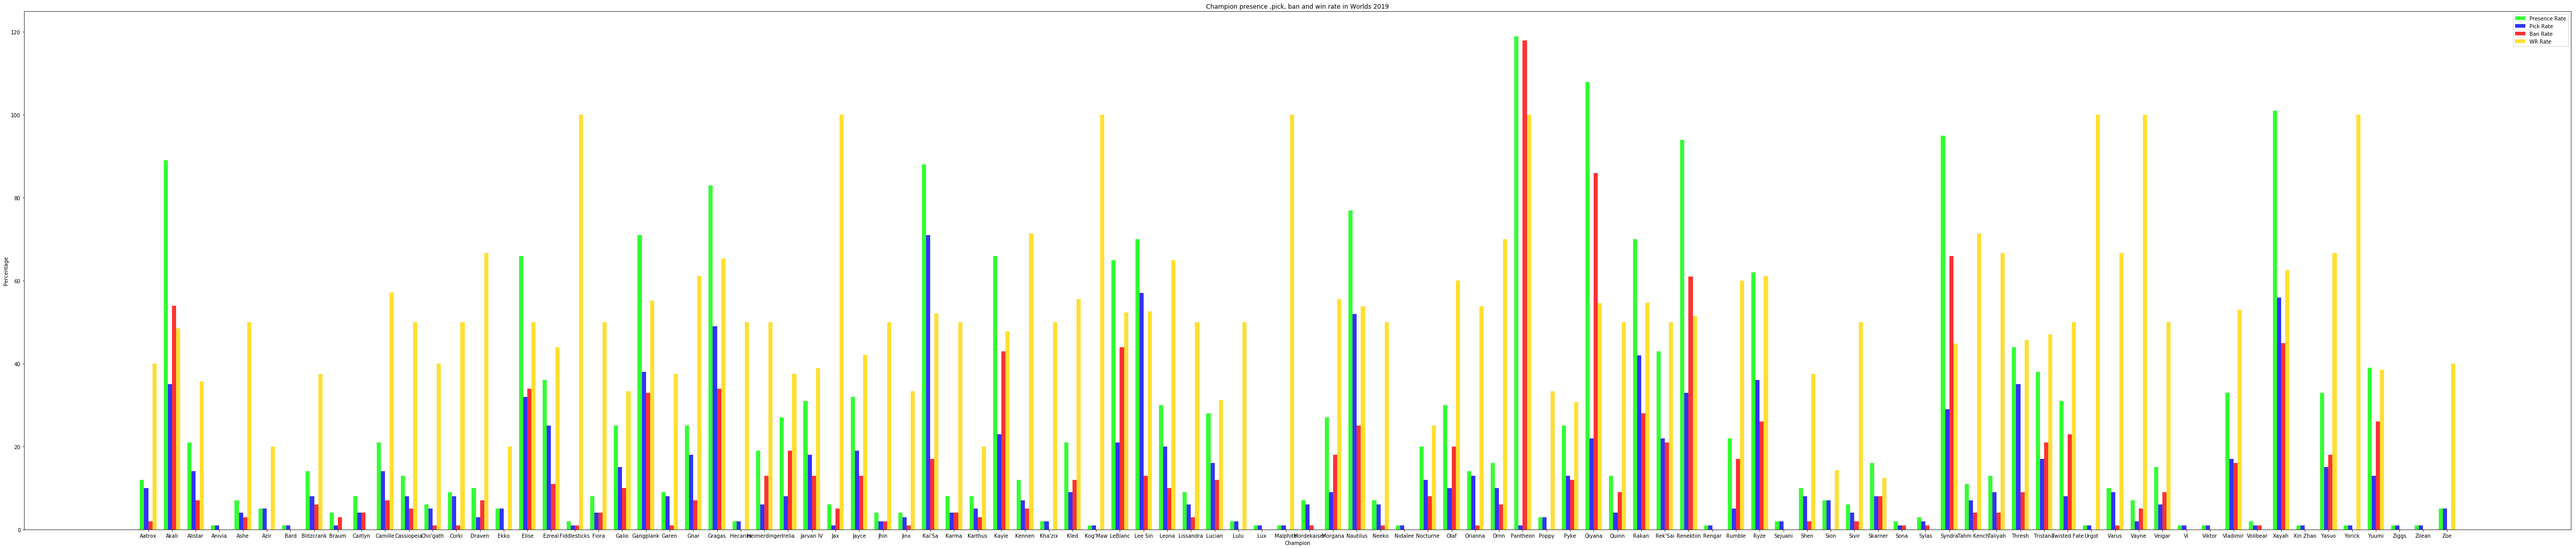

In [40]:
#Display mix of everything
n_groups = len(pickChampList)

#get array of champion winrate
chWRArr = []
for i in range (0,len(pickChampList)):  #from 0 to all the champion picked in the worlds tournament
    chWRArr.append((winRateDf[winRateDf['champion']== pickChampList[i]]['winrate']).iloc[0])

#get array of total champion picked times
chPickArr = []
for i in range (0,len(pickChampList)):  #from 0 to all the champion picked in the worlds tournament
    chPickArr.append(teamPickDf[teamPickDf['champion']== pickChampList[i]]['champion'].value_counts().iloc[0])

#get array of champion banned times
chBanArr = []
champBanDf = champBanList.to_frame().reset_index()
champBanDf = champBanDf.rename(columns= {0: 'champion'})
for i in range (0,len(pickChampList)):  #from 0 to all the champion picked in the worlds tournament
    #if champ never been ban
    if(pickChampList[i] in champBanDf['champion'].values):
        dummy = champBanDf[champBanDf['champion'].values== pickChampList[i]]['champion'].value_counts()
        chBanArr.append(dummy[0])
    else:
        chBanArr.append(0)


#get array of champion presence
chPRArr = []
pickBanDf = pickBanList.to_frame().reset_index()
pickBanDf = pickBanDf.rename(columns= {0: 'champion'})
pickBanDf
for i in range (0,len(pickChampList)):  #from 0 to all the champion picked in the worlds tournament
    dummy = pickBanDf[pickBanDf['champion'].values == pickChampList[i]]['champion'].value_counts()
    chPRArr.append(dummy[0])

    
#create plot
fig, ax = plt.subplots(figsize=(70,15))
index = np.arange(n_groups)*2
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, chPRArr, bar_width,alpha=opacity,color='lime',label='Presence Rate')
rects2 = plt.bar(index + (1*bar_width),chPickArr, bar_width,alpha=opacity,color='b',label='Pick Rate')
rects3 = plt.bar(index + (2*bar_width), chBanArr, bar_width,alpha=opacity,color='r',label='Ban Rate')
rects4 = plt.bar(index + (3*bar_width), chWRArr, bar_width,alpha=opacity,color='gold',label='WR Rate')

plt.xlabel('Champion')
plt.ylabel('Percentage')
plt.title('Champion presence ,pick, ban and win rate in Worlds 2019')
plt.xticks(index + 1.5*bar_width,pickChampList)
plt.legend()

plt.tight_layout()
plt.show()

## Champion win rate analysis

For Champion Pantheon, he was only picked once in the Lol 2019 World Tournamentand won the match. But we can't say Pantheon with a 100% presence rate,win rate and 99.16% ban rate is the best champion in the whole tournament simply because there is no enough played matches to support it. But undoubtly he is one of the best champion to be picked.

Gangplank, Gragas , Kai'Sa, Kayle, Leblanc, Lee Sin , Nautilus, Qiyana and Xayah all have over 50% winrate and strong presence rate in the Lol Worlds 2019 Tournament.

Now we have discovered certain champions are better to be picked, we are now to find out what champion combinations has strong win rate as well.

In [41]:

pickBanChampion.head(15)


,gameid,side,team,position,champion,ban1,ban2,ban3,ban4,ban5,result
0,1070340,Blue,DetonatioN FocusMe,Top,Gnar,Qiyana,Gangplank,Akali,Elise,Olaf,0
1,1070340,Blue,DetonatioN FocusMe,Jungle,Ekko,Qiyana,Gangplank,Akali,Elise,Olaf,0
2,1070340,Blue,DetonatioN FocusMe,Middle,Nocturne,Qiyana,Gangplank,Akali,Elise,Olaf,0
3,1070340,Blue,DetonatioN FocusMe,ADC,Lucian,Qiyana,Gangplank,Akali,Elise,Olaf,0
4,1070340,Blue,DetonatioN FocusMe,Support,Thresh,Qiyana,Gangplank,Akali,Elise,Olaf,0
5,1070340,Red,Splyce,Top,Kennen,Heimerdinger,Pantheon,Syndra,Cassiopeia,Kai'Sa,1
6,1070340,Red,Splyce,Jungle,Hecarim,Heimerdinger,Pantheon,Syndra,Cassiopeia,Kai'Sa,1
7,1070340,Red,Splyce,Middle,Ryze,Heimerdinger,Pantheon,Syndra,Cassiopeia,Kai'Sa,1
8,1070340,Red,Splyce,ADC,Xayah,Heimerdinger,Pantheon,Syndra,Cassiopeia,Kai'Sa,1
9,1070340,Red,Splyce,Support,Rakan,Heimerdinger,Pantheon,Syndra,Cassiopeia,Kai'Sa,1


In [42]:
#find association

#add pickban champ to an array
gamePick = []
gameid = 0
side =""
row = []
for i in range (0,pickBanChampion['champion'].count()):
    if(i==0):
        gameid = pickBanChampion.iloc[i]['gameid']
        side = pickBanChampion.iloc[i]['side']
        row.append(pickBanChampion.iloc[i]['champion'])
    elif(gameid != pickBanChampion.iloc[i]['gameid'] or side != pickBanChampion.iloc[i]['side']):
        gameid = pickBanChampion.iloc[i]['gameid']
        side = pickBanChampion.iloc[i]['side']
        gamePick.append(row)
        row = []
        if(pickBanChampion.iloc[i]['position']!='Team'):
            row.append(pickBanChampion.iloc[i]['champion'])
            
            
    else:
        if(pickBanChampion.iloc[i]['position']!='Team'):
            row.append(pickBanChampion.iloc[i]['champion'])
            
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

gamePick = remove_values_from_list(gamePick,[])
len(gamePick)

        

238

In [43]:
#find out what's the winning team comp and losing team comp
winningGamePick =[]
losingGamePick = []
gameid = 0
win = 1
side =""
row = []
for i in range (0,pickBanChampion['champion'].count()):
    if(i==0):
        gameid = pickBanChampion.iloc[i]['gameid']
        side = pickBanChampion.iloc[i]['side']
        row.append(pickBanChampion.iloc[i]['champion'])
    elif(gameid != pickBanChampion.iloc[i]['gameid'] or side != pickBanChampion.iloc[i]['side']):
        if(pickBanChampion.iloc[i-1]['result'] == win):
            winningGamePick.append(row)
        else:
            losingGamePick.append(row)
        gameid = pickBanChampion.iloc[i]['gameid']
        side = pickBanChampion.iloc[i]['side']
        row = []
        if(pickBanChampion.iloc[i]['position']!='Team'):
            row.append(pickBanChampion.iloc[i]['champion'])
                       
    else:
        if(pickBanChampion.iloc[i]['position']!='Team'):
            row.append(pickBanChampion.iloc[i]['champion'])
            
winningGamePick = remove_values_from_list(winningGamePick,[])
losingGamePick = remove_values_from_list(losingGamePick,[])
losingGamePick

[['Gnar', 'Ekko', 'Nocturne', 'Lucian', 'Thresh'],
 ['Akali', 'Ekko', 'Renekton', 'Xayah', 'Rakan'],
 ['Renekton', 'Ekko', 'Corki', "Kai'Sa", 'Alistar'],
 ['Kayle', 'Ekko', 'Karma', 'Xayah', 'Rakan'],
 ['Karma', 'Nocturne', 'Azir', "Kai'Sa", 'Nautilus'],
 ['Gangplank', 'Lee Sin', 'Lissandra', "Kai'Sa", 'Nautilus'],
 ['Renekton', 'Qiyana', 'Sylas', 'Xayah', 'Rakan'],
 ['Renekton', "Rek'Sai", 'Syndra', 'Tristana', 'Thresh'],
 ['Aatrox', "Rek'Sai", 'Neeko', 'Caitlyn', 'Thresh'],
 ['Gangplank', 'Lee Sin', 'Akali', 'Syndra', 'Thresh'],
 ['Azir', 'Karthus', 'Renekton', "Kai'Sa", 'Nautilus'],
 ['Mordekaiser', 'Elise', 'Qiyana', 'Sivir', 'Pyke'],
 ['Kennen', 'Hecarim', 'LeBlanc', "Kai'Sa", 'Nautilus'],
 ['Renekton', "Rek'Sai", 'LeBlanc', 'Syndra', 'Leona'],
 ['Gnar', 'Skarner', 'Ziggs', 'Ezreal', 'Rakan'],
 ['Gangplank', 'Jarvan IV', 'LeBlanc', 'Xayah', 'Alistar'],
 ['Quinn', 'Jarvan IV', 'LeBlanc', 'Lucian', 'Braum'],
 ['Camille', 'Sejuani', 'Syndra', 'Lucian', 'Nautilus'],
 ['Mordekaiser', '

From above, we can see each team pick are put in an array for Association analysis.

In [52]:
#References from https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

from apyori import apriori as apriori

association_rules = apriori(gamePick, min_support=(3/numOfGamePlayed), min_confidence=0.3, min_lift=2, max_length=2,VERBOSE=True) #must appear at least 3 times throughout the world tournament
association_results = list(association_rules)
print(len(association_results))

17


In [45]:


def print_apriori(association_results,types):    
    for item in association_results:

        # first index of the inner list
        # Contains base item and add item
        pair = item[0] 
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])

        #second index of the inner list
        print("Support: " + str(item[1]))

        #average appearance in games
        print(types+":", (item[1]*numOfGamePlayed),"Games")
        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")
        
print_apriori(association_results,"Appearance")

Rule: Gragas -> Alistar
Support: 0.025210084033613446
Appearance: 3.0 Games
Confidence: 0.4285714285714286
Lift: 2.0816326530612246
Rule: Camille -> Elise
Support: 0.025210084033613446
Appearance: 3.0 Games
Confidence: 0.4285714285714286
Lift: 3.1875000000000004
Rule: Gragas -> Gangplank
Support: 0.06722689075630252
Appearance: 8.0 Games
Confidence: 0.4210526315789474
Lift: 2.0451127819548875
Rule: Garen -> Yuumi
Support: 0.03361344537815126
Appearance: 4.0 Games
Confidence: 1.0
Lift: 18.307692307692307
Rule: Gragas -> Varus
Support: 0.025210084033613446
Appearance: 3.0 Games
Confidence: 0.6666666666666667
Lift: 3.2380952380952386
Rule: Gragas -> Yasuo
Support: 0.05042016806722689
Appearance: 6.0 Games
Confidence: 0.8
Lift: 3.885714285714286
Rule: Kai'Sa -> Leona
Support: 0.05042016806722689
Appearance: 6.0 Games
Confidence: 0.6
Lift: 2.011267605633803
Rule: Kai'Sa -> Taliyah
Support: 0.025210084033613446
Appearance: 3.0 Games
Confidence: 0.6666666666666667
Lift: 2.234741784037559
Rule

From the data above, we can see all those champion combination has appeared at least 3 times in the whole tournament.

In [46]:
association_rules = apriori(losingGamePick, min_support=(3/numOfGamePlayed),min_confidence=0.3, min_lift=2, max_length=2,VERBOSE=True) #must appear at least 3 times throughout the world tournament
association_results = list(association_rules)
print(len(association_results))

30


In [47]:
print_apriori(association_results,"Loss")

Rule: Tristana -> Akali
Support: 0.03361344537815126
Loss: 4.0 Games
Confidence: 0.4444444444444445
Lift: 2.938271604938272
Rule: Akali -> Vladimir
Support: 0.025210084033613446
Loss: 3.0 Games
Confidence: 0.375
Lift: 2.479166666666667
Rule: Akali -> Yuumi
Support: 0.025210084033613446
Loss: 3.0 Games
Confidence: 0.375
Lift: 2.479166666666667
Rule: Gragas -> Alistar
Support: 0.025210084033613446
Loss: 3.0 Games
Confidence: 0.33333333333333337
Lift: 2.333333333333334
Rule: Azir -> Kai'Sa
Support: 0.025210084033613446
Loss: 3.0 Games
Confidence: 0.75
Lift: 2.625
Rule: Blitzcrank -> Kai'Sa
Support: 0.025210084033613446
Loss: 3.0 Games
Confidence: 0.6
Lift: 2.1
Rule: Lee Sin -> Blitzcrank
Support: 0.025210084033613446
Loss: 3.0 Games
Confidence: 0.6
Lift: 2.6444444444444444
Rule: Tristana -> Elise
Support: 0.025210084033613446
Loss: 3.0 Games
Confidence: 0.33333333333333337
Lift: 2.479166666666667
Rule: Ezreal -> Jarvan IV
Support: 0.03361344537815126
Loss: 4.0 Games
Confidence: 0.36363636

From the data above, we can see all those champion combination has lost at least 3 times in the whole tournament.

References:
1.Capture from Kevin Webb ,Business Insider Article : 'After spending 10 years turning 'League of Legends' into a global powerhouse, Riot Games is celebrating with 7 new titles' , url: https://www.businessinsider.com/league-of-legends-anniversary-new-titles-riot-games-interview-2019-10?r=US&IR=T

In [48]:
association_rules = apriori(winningGamePick, min_support=(3/numOfGamePlayed), min_confidence=0.3, min_lift=2, max_length=2,VERBOSE=True) #must appear at least 3 times throughout the world tournament
association_results = list(association_rules)
print(len(association_results))

31


In [49]:
print_apriori(association_results,"Won")

Rule: Camille -> Akali
Support: 0.025210084033613446
Won: 3.0 Games
Confidence: 0.375
Lift: 2.625
Rule: Kled -> Akali
Support: 0.025210084033613446
Won: 3.0 Games
Confidence: 0.6
Lift: 4.2
Rule: Gragas -> Alistar
Support: 0.025210084033613446
Won: 3.0 Games
Confidence: 0.6
Lift: 2.23125
Rule: Kai'Sa -> Alistar
Support: 0.03361344537815126
Won: 4.0 Games
Confidence: 0.7999999999999999
Lift: 2.572972972972973
Rule: Camille -> Elise
Support: 0.03361344537815126
Won: 4.0 Games
Confidence: 0.5
Lift: 3.71875
Rule: Elise -> Lucian
Support: 0.025210084033613446
Won: 3.0 Games
Confidence: 0.6
Lift: 4.4625
Rule: Elise -> Orianna
Support: 0.025210084033613446
Won: 3.0 Games
Confidence: 0.4285714285714286
Lift: 3.1875000000000004
Rule: Lee Sin -> Galio
Support: 0.025210084033613446
Won: 3.0 Games
Confidence: 0.6
Lift: 2.38
Rule: LeBlanc -> Gangplank
Support: 0.03361344537815126
Won: 4.0 Games
Confidence: 0.3636363636363636
Lift: 2.06060606060606
Rule: Garen -> Yuumi
Support: 0.025210084033613446
W

From the data above, we can see all those champion combination has won at least 3 times in the whole tournament.

## Modeling analysis

The result of using Apriori algorithm from library apyori do not look trustable as from the results above, 31 champions combination have won at 3 games, 30 champions combination have lost at least 3 games, but there are only 17 different unique picks from the gamePick dataframe. Thus, I have used another Apriori algorith from a different library mlxtend.frequent_pattern

In [53]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori as mlxtApriori
from IPython.display import display, HTML

#Winning team pick assocation
te = TransactionEncoder()
te_ary = te.fit(winningGamePick).transform(winningGamePick)
df = pd.DataFrame(te_ary, columns=te.columns_)
df


,Aatrox,Akali,Alistar,Ashe,Azir,Blitzcrank,Camille,Cassiopeia,Cho'gath,Corki,...,Urgot,Varus,Vayne,Veigar,Vladimir,Xayah,Yasuo,Yorick,Yuumi,Zoe
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
115,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
117,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
frequent_itemsets = mlxtApriori(df, min_support=(3/numOfGamePlayed), use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.033613,(Aatrox)
1,0.142857,(Akali)
2,0.042017,(Alistar)
3,0.025210,(Blitzcrank)
4,0.067227,(Camille)
...,...,...
185,0.033613,"(Rek'Sai, Kai'Sa, Ryze)"
186,0.025210,"(Lee Sin, Ryze, Leona)"
187,0.033613,"(Xayah, Lee Sin, Rakan)"
188,0.033613,"(Xayah, Rakan, Ryze)"


In [55]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets['game won'] = frequent_itemsets['support'].apply(lambda x: x*numOfGamePlayed)
frequent_itemsets

,support,itemsets,length,game won
0,0.033613,(Aatrox),1,4.0
1,0.142857,(Akali),1,17.0
2,0.042017,(Alistar),1,5.0
3,0.025210,(Blitzcrank),1,3.0
4,0.067227,(Camille),1,8.0
...,...,...,...,...
185,0.033613,"(Rek'Sai, Kai'Sa, Ryze)",3,4.0
186,0.025210,"(Lee Sin, Ryze, Leona)",3,3.0
187,0.033613,"(Xayah, Lee Sin, Rakan)",3,4.0
188,0.033613,"(Xayah, Rakan, Ryze)",3,4.0


We are only interested in winning team picks of length 2 that have a support of 3/(Number of Game played in worlds 2019), which mean certain champion picks combination has won over at least 3 games in the worlds 2019 championship.

In [56]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['game won'] >= 5) ].sort_values(by=['game won'],ascending = False)

,support,itemsets,length,game won
156,0.151261,"(Xayah, Rakan)",2,18.0
114,0.109244,"(Kai'Sa, Nautilus)",2,13.0
79,0.092437,"(Gragas, Gangplank)",2,11.0
119,0.075630,"(Kai'Sa, Ryze)",2,9.0
112,0.075630,"(Lee Sin, Kai'Sa)",2,9.0
113,0.067227,"(Kai'Sa, Leona)",2,8.0
84,0.067227,"(Gangplank, Nautilus)",2,8.0
88,0.067227,"(Xayah, Gangplank)",2,8.0
137,0.067227,"(Xayah, Lee Sin)",2,8.0
108,0.058824,"(Gragas, Yasuo)",2,7.0


Now do the same but show 3 unique team combination

In [57]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['game won'] >= 3) ].sort_values(by=['game won'],ascending = False)

,support,itemsets,length,game won
181,0.050420,"(Lee Sin, Kai'Sa, Leona)",3,6.0
175,0.042017,"(Gragas, Gangplank, Nautilus)",3,5.0
188,0.033613,"(Xayah, Rakan, Ryze)",3,4.0
180,0.033613,"(Gragas, Varus, Tahm Kench)",3,4.0
187,0.033613,"(Xayah, Lee Sin, Rakan)",3,4.0
185,0.033613,"(Rek'Sai, Kai'Sa, Ryze)",3,4.0
176,0.033613,"(Xayah, Gragas, Gangplank)",3,4.0
182,0.033613,"(Lee Sin, Kai'Sa, Ryze)",3,4.0
186,0.025210,"(Lee Sin, Ryze, Leona)",3,3.0
184,0.025210,"(Rek'Sai, Kai'Sa, Nautilus)",3,3.0


In [62]:
#game pick
te = TransactionEncoder()
te_ary = te.fit(gamePick).transform(gamePick)
gamePickdf = pd.DataFrame(te_ary, columns=te.columns_)
gamePickdf

frequent_itemsets_pick = mlxtApriori(gamePickdf, min_support=(3/numOfGamePlayed), use_colnames=True)

frequent_itemsets_pick['length'] = frequent_itemsets_pick['itemsets'].apply(lambda x: len(x))
frequent_itemsets_pick['game appear'] = frequent_itemsets_pick['support'].apply(lambda x: x*numOfGamePlayed*2)
frequent_itemsets_pick

,support,itemsets,length,game appear
0,0.042017,(Aatrox),1,10.0
1,0.147059,(Akali),1,35.0
2,0.058824,(Alistar),1,14.0
3,0.033613,(Blitzcrank),1,8.0
4,0.058824,(Camille),1,14.0
...,...,...,...,...
137,0.025210,"(Xayah, Gragas, Gangplank)",3,6.0
138,0.025210,"(Xayah, Rakan, Gangplank)",3,6.0
139,0.029412,"(Lee Sin, Kai'Sa, Leona)",3,7.0
140,0.033613,"(Lee Sin, Kai'Sa, Nautilus)",3,8.0


In [65]:
frequent_itemsets_pick[ (frequent_itemsets_pick['length'] == 2) &
                   (frequent_itemsets_pick['game appear'] >= 5) ].sort_values(by=['game appear'],ascending = False)

,support,itemsets,length,game appear
125,0.130252,"(Xayah, Rakan)",2,31.0
97,0.109244,"(Kai'Sa, Nautilus)",2,26.0
95,0.092437,"(Lee Sin, Kai'Sa)",2,22.0
73,0.067227,"(Gragas, Gangplank)",2,16.0
81,0.054622,"(Xayah, Gangplank)",2,13.0
...,...,...,...,...
102,0.025210,"(Kai'Sa, Taliyah)",2,6.0
106,0.025210,"(Xayah, LeBlanc)",2,6.0
111,0.025210,"(Lee Sin, Syndra)",2,6.0
112,0.025210,"(Lee Sin, Thresh)",2,6.0


In [68]:
frequent_itemsets_pick[ (frequent_itemsets_pick['length'] == 3) &
                   (frequent_itemsets_pick['game appear'] >= 0) ].sort_values(by=['game appear'],ascending = False)

,support,itemsets,length,game appear
140,0.033613,"(Lee Sin, Kai'Sa, Nautilus)",3,8.0
139,0.029412,"(Lee Sin, Kai'Sa, Leona)",3,7.0
136,0.025210,"(Gragas, Gangplank, Nautilus)",3,6.0
137,0.025210,"(Xayah, Gragas, Gangplank)",3,6.0
138,0.025210,"(Xayah, Rakan, Gangplank)",3,6.0
141,0.025210,"(Xayah, Lee Sin, Rakan)",3,6.0


## Analysis winning team champion association
From the results above, (Lee Sin, Kai'Sa, Leona) have picked together 7 times and were able to win 6 times. (Gragas, Gangplank, Nautilus) were picked together 6 times and able to win 5 times.
(Xayah, Rakan)	were picked together 31 times and won over half of them (18 times).  (Kai'Sa, Nautilus)	 were picked 26 times but only won half of them. (Gragas, Gangplank) were picked 16 times and only lost 5 times which makes them the strongest duo in the whole tournament.

However only 6 results with 3 picked unique champion combination were return from the  while there are 20 results return from the 3 winning unique champion champion which is result this research not accurate.

## Determine what is the world champion team favourite champion picks 
FunPlus Phoenix (FPX) is a Chinese professional esport organization, recently entering in the League of Legends scene and won the 2019 League of Legends World Championship after defeating G2 Esports in the grand finals. We are using the same apriori algorith to find out what champions are their favourite in the worlds 2019 tournament.

In [70]:


condition = pickBanChampion['team'] == 'Funplus Phoenix'
FPXPick = pickBanChampion[condition][['gameid','team','position','champion','result']]

FPXPick = FPXPick[FPXPick['position']!='Team']
numFPXPlayed = FPXPick['gameid'].nunique()
print(numFPXPlayed)
FPXPick=FPXPick[FPXPick['result'] == 1]
FPXPick

18


,gameid,team,position,champion,result
672,1061156,Funplus Phoenix,Top,Renekton,1
673,1061156,Funplus Phoenix,Jungle,Lee Sin,1
674,1061156,Funplus Phoenix,Middle,Ryze,1
675,1061156,Funplus Phoenix,ADC,Kai'Sa,1
676,1061156,Funplus Phoenix,Support,Leona,1
...,...,...,...,...,...
1416,1072517,Funplus Phoenix,Top,Gangplank,1
1417,1072517,Funplus Phoenix,Jungle,Lee Sin,1
1418,1072517,Funplus Phoenix,Middle,Galio,1
1419,1072517,Funplus Phoenix,ADC,Xayah,1


In [72]:
#Champions pick that helped FunPlux Phoenix to win the matches.
FPXWinPick = [] 
gameid = 0
row = []
for i in range (0,FPXPick['champion'].count()):
    if(i==0):
        gameid = FPXPick.iloc[i]['gameid']
        row.append(FPXPick.iloc[0]['champion'])
    elif(gameid != FPXPick.iloc[i]['gameid']):
        gameid = FPXPick.iloc[i]['gameid']
        FPXWinPick.append(row)
        row = []   
        row.append(FPXPick.iloc[i]['champion'])
    else:
        row.append(FPXPick.iloc[i]['champion'])
FPXWinPick


[['Renekton', 'Lee Sin', 'Ryze', "Kai'Sa", 'Leona'],
 ['Renekton', 'Qiyana', 'Kayle', 'Vayne', 'Nautilus'],
 ['Gangplank', 'Gragas', 'Malphite', "Kai'Sa", 'Nautilus'],
 ['Renekton', 'Elise', 'Ryze', 'Varus', 'Tahm Kench'],
 ['Ryze', 'Gragas', 'Renekton', 'Vayne', 'Thresh'],
 ['Camille', 'Olaf', 'Ryze', 'Xayah', 'Rakan'],
 ['Gnar', 'Gragas', 'Kayle', 'Varus', 'Tahm Kench'],
 ['Camille', 'Gragas', 'Ryze', 'Varus', 'Tahm Kench'],
 ['Renekton', 'Qiyana', 'Rumble', 'Ezreal', 'Nautilus'],
 ['Gangplank', 'Qiyana', 'Nautilus', 'Xayah', 'Thresh'],
 ['Gangplank', 'Gragas', 'Nautilus', 'Varus', 'Tahm Kench'],
 ['Gangplank', 'Lee Sin', 'Nautilus', 'Sivir', 'Thresh'],
 ['Kled', 'Lee Sin', 'Ryze', "Kai'Sa", 'Galio']]

In [73]:
#FUN Plus Phoenix team pick assocation
te = TransactionEncoder()
te_ary = te.fit(FPXWinPick).transform(FPXWinPick)
FPXWinDf = pd.DataFrame(te_ary, columns=te.columns_)
FPXWinDf

,Camille,Elise,Ezreal,Galio,Gangplank,Gnar,Gragas,Kai'Sa,Kayle,Kled,...,Rakan,Renekton,Rumble,Ryze,Sivir,Tahm Kench,Thresh,Varus,Vayne,Xayah
0,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
2,False,False,False,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,True,False,True,False
5,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
6,False,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
7,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,True,False,False
8,False,False,True,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [74]:
frequent_itemsets_FPX = mlxtApriori(FPXWinDf, min_support=(3/numFPXPlayed), use_colnames=True) #win at least 3 game with champ assosiation
frequent_itemsets_FPX['length'] = frequent_itemsets_FPX['itemsets'].apply(lambda x: len(x))
frequent_itemsets_FPX['game won'] = frequent_itemsets_FPX['support'].apply(lambda x: x*len(FPXWinDf)) 
frequent_itemsets_FPX.sort_values(by=['game won'],ascending = False)

,support,itemsets,length,game won
4,0.461538,(Nautilus),1,6.0
7,0.461538,(Ryze),1,6.0
6,0.384615,(Renekton),1,5.0
1,0.384615,(Gragas),1,5.0
0,0.307692,(Gangplank),1,4.0
16,0.307692,"(Varus, Tahm Kench)",2,4.0
8,0.307692,(Tahm Kench),1,4.0
10,0.307692,(Varus),1,4.0
11,0.307692,"(Gangplank, Nautilus)",2,4.0
13,0.230769,"(Gragas, Varus)",2,3.0


In [77]:
frequent_itemsets_FPX[ (frequent_itemsets_FPX['length'] == 2) &
                   (frequent_itemsets_FPX['game won'] >= 3) ].sort_values(by=['game won'],ascending = False)

,support,itemsets,length,game won
11,0.307692,"(Gangplank, Nautilus)",2,4.0
16,0.307692,"(Varus, Tahm Kench)",2,4.0
12,0.230769,"(Gragas, Tahm Kench)",2,3.0
13,0.230769,"(Gragas, Varus)",2,3.0
14,0.230769,"(Qiyana, Nautilus)",2,3.0
15,0.230769,"(Renekton, Ryze)",2,3.0


In [78]:
frequent_itemsets_FPX[ (frequent_itemsets_FPX['length'] == 3) &
                   (frequent_itemsets_FPX['game won'] >= 3) ].sort_values(by=['game won'],ascending = False)

,support,itemsets,length,game won
17,0.230769,"(Gragas, Varus, Tahm Kench)",3,3.0


From the results above, it shows FPX favourite team compostion are (Gragas, Varus, Tahm Kench), their favourite duo champions are (Gangplank, Nautilus),(Varus, Tahm Kench)	 respectively.
(Gangplank, Nautilus) were won 8 times throughout the tournament and half of them are contributed by FPX. (Varus, Tahm Kench) have won times in the tournament and FPX have won 4 of them.
Out of all 13 games they won, their best champion are Ryze and Nautilus, with both of them won them 6 matches. It is interesting to see Varus was always picked with Tahm Kench (4 out of 4) and Nautilus was always picked to played with Gankplank.(4 out of 4)

## Conclusion
Before we jump into our champion analysis conclusion, we have to know that Esports and League of Legends is just like any regular sport. They are all played by human being and the match results can be affected by lot of reason and variable. There are many stats in the game can matter a lot and cut to the core of the game, just like gold difference, objective control (baron, dragon) and death count. Understanding them is crucially important, just like high field goal percentage, get to the foul line, get offensive rebounds, and not turn the ball over are important in a basketball match.

But there are still a lot stats despite carry lot of information but actually don't say much. People even lie to themself by making compelling story to predict t results by a player or a team over the course of a given season. Finally, sports with statistics always comes up to two issues: One is the fact that sports have small sample sizes, and Two is that human beings play them. They can perform well sometimes so do they can get distracted.[4] However, I believe using data with big sample size, especially with the global popularity of League of Legends, the data from the game will helps team to determine the key strategy and pick to win the game.

[1]2019 Lol Wolrds Championship URL : https://en.wikipedia.org/wiki/2019_League_of_Legends_World_Championship
[2]League of Legends wikipeida URL : https://en.wikipedia.org/wiki/League_of_Legends
[3]LoL worlds championship champion stats URL : https://lol.gamepedia.com/2016_Season_World_Championship/Champion_Statistics 
[4]References answer by Answer by John Fernandez, Director of Analytics and Operations , URL : https://www.forbes.com/sites/quora/2016/05/10/how-much-do-statistics-matter-in-determining-success-in-sports/#859527ef802f